In [1]:
import numpy as np
from matplotlib import pyplot as plt

macros latex
$$ 
\def\R{{\mathbb R}} 
\def\x{{\bf x}}
\def\y{{\bf y}}
\def\a{{\bf a}}
$$

# Regression linéaire

## introduction n°1 : approximation par une constante

On dispose d'un ensemble de relevés de $m$ mesures sur une grandeur $Y$ lors d'une expérience scientifique répétée plusieurs fois. Par exemple, la mesure du pH d'une solution   après une réaction chimique.
 $$ y^1=5.7, y^2=5.8, y^3=5.7, y^4=5.6, y^5=5.85, \dots $$
  Par quelle valeur constante $b$ **prédire** la véritable mesure ?

In [59]:
Y = np.array([5.7, 5.8, 5.7, 5.6, 5.85, 5.91, 5.73])

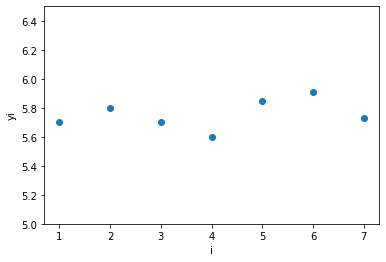

In [3]:
plt.ylim(5,6.5) ; plt.xlabel('i') ; plt.ylabel('yi')
plt.plot(list(range(1,1+len(Y))),Y,'o')
plt.show()

On mesure l'erreur d'une prédiction $b$ entre la mesure prédite et les mesures observées par l'**erreur quadratique moyenne**
$$\text{EQM}(b) = \frac1{m} \sum_{i=1}^m (b-y^i)^2$$

Représentation de l'EQM en fonction de $b$

In [4]:
b = 5
m = len(Y)
EQM = lambda b: sum([(b-yi)**2 for yi in Y])

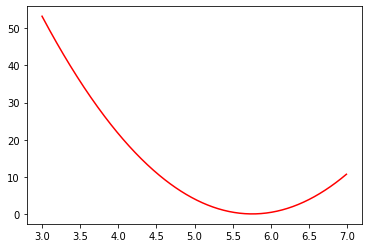

In [5]:
X = np.arange(3,7,0.01)
Z = EQM(X)
plt.plot(X,Z,'r') ; plt.show()

L'EQM est une fonction strictement convexe de $b$, dont le minimum peut être déterminé par l'annulation de la dérivée

$$ \frac{d}{db}( \frac1{m} \sum_{i=1}^m (b-y^i)^2 ) = 0$$
$$\frac1{m} \sum_{i=1}^m 2(b - y^i ) = 0 $$
$$ 2b - 2 \frac1{m} \sum_{i=1}^m y^i  = 0$$
$$ b =  \frac1{m} \sum_{i=1}^m y^i $$




La moyenne arithmétique $$\bar{y} = \frac1{m} \sum_{i=1}^m y^i $$ minimise donc l'erreur quadratique moyenne.  
Parmi toutes les prédictions constantes possibles, celle qui approche le mieux au sens de l'EQM les données est la moyenne arithmétique.

## Approximation par une fonction linéaire

On a cette fois ci des données de la forme $(x^i,y^i)$ pour $i$ de 1 à $m$ où $y^i$ est l'image de $x^i$ par une fonction inconnue que l'on cherche à approximer. On suppose que les points sont situés presque alignés sur une droite passant par l'origine, et on cherche donc une fonction de la forme $g(x) = ax$ pour l'approximation.

exemple :

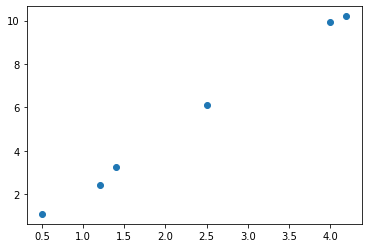

In [6]:
X = np.array([0.5, 1.2, 1.4, 2.5, 4, 4.2])
Y = np.array([1.1 ,  2.41,  3.26,  6.1  ,  9.92 , 10.2])
plt.plot(X,Y,'o') ; plt.show()

On mesure de nouveau la qualité de l'approximation par l'erreur quadratique moyenne :
$$EQM = \frac1{m} \sum_{i=1}^m (a x^i - y^i)^2$$

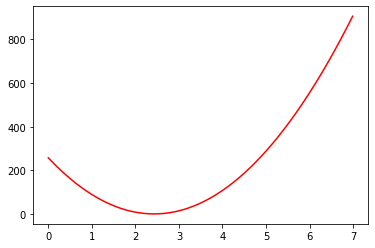

In [7]:
EMQ2 = lambda a: ((a*X-Y)**2).sum()
A = np.arange(0,7,0.01)
plt.plot(A,[EMQ2(a) for a in A],'r') ; plt.show()

L'EMQ est minimale quand sa dérivée s'annule :
$$ \frac{d}{da}( \frac1{m} \sum_{i=1}^m (ax^i-y^i)^2 ) = 0$$
$$\frac1{m} \sum_{i=1}^m 2x^i(ax^i - y^i ) = 0 $$
$$ \frac2{m} \sum_{i=1}^m a (x^i)^2 - \frac2{m} \sum_{i=1}^m x^i y^i  = 0$$
$$ \boxed{a_\min =  \frac{\frac1{m} \sum_{i=1}^m x^i y^i}{\frac1{m} \sum_{i=1}^m (x^i)^2}} $$



In [8]:
amin = sum(X*Y) / sum(X*X) ; amin

2.4293982544786403

Vérification expérimentale de la formule obtenue

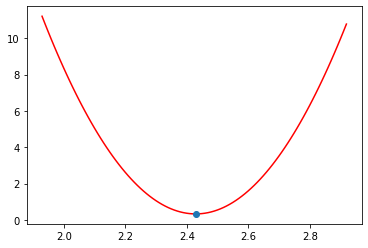

In [9]:
A = np.arange(amin-0.5,amin+0.5,0.01)
plt.plot(A, [EMQ2(a) for a in A],'r') ; plt.plot(amin,EMQ2(amin),'o')
plt.show()

Droite de régression *linéaire* (non affine) obtenue

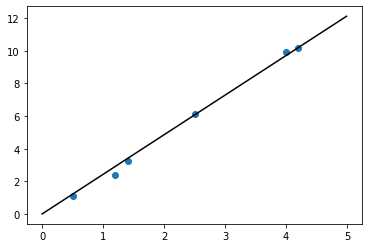

In [10]:
dr = lambda x:amin*x
X2 = np.arange(0,5,0.01)
plt.plot(X,Y,'o',X2,dr(X2),'k') ; plt.show()

## Regression linéaire simple
C'est le terme utilisé pour la regression linéaire en dimension 1. Attention on emploie le terme linéaire mais il s'agit en fait d'une regression affine en dimension 1 (qui revient à une reg. linéaire en dim 2, voir plus tard).

### Le problème
On a toujours des couples de données de dimension 1, sous la forme $(x^i,y^i)$ pour $1 \leq i \leq m$, mais on cherche maintenant une approximation de ces données par une droite qui ne passe pas forcément par l'origine. Plus précisément, on cherche à approximer la fonction inconnue $f$ telle que $f(x^i)=y^i$ par une fonction $g$ de la forme $g(x) = ax+b$.

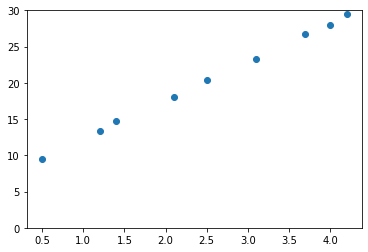

In [11]:
X = np.array([0.5, 1.2, 1.4, 2.5, 3.1, 4, 4.2, 2.1, 3.7])
Y = np.array([ 9.5, 13.4, 14.7, 20.4, 23.3, 28 , 29.51, 18.1, 26.71])
plt.ylim(0,30)
plt.plot(X,Y,'o') ; plt.show()

On va chercher les paramètres $a$ et $b$ qui minimisent l'erreur quadratique moyenne :
$$ \boxed{EQM = \frac1{m} \sum_{i=1}^m (a x^i  + b - y^i)^2}$$

note : ceci revient à minimiser la distance entre les vecteur $a {\bf x}+b \mathbb{1} $ et 
$y$ au sens de la norme 2.

In [12]:
a1 = np.arange(3,7,0.05)
b1 = np.arange(5,8,0.05)
A, B = np.meshgrid(a1,b1)

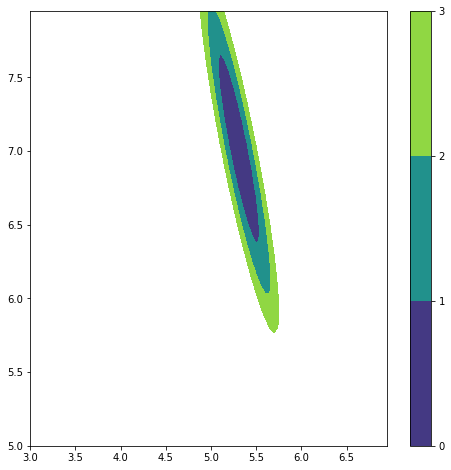

In [13]:
EQN3 = lambda a,b: sum([(a*X[i]+b-Y[i])**2 for i in range(len(X))])
Z = EQN3(A,B) ; levels = [0.0, 1.0, 2.0, 3.0,]
plt.figure(figsize=(8,8))
cp = plt.contourf(A, B, Z, levels)
plt.colorbar(cp) ; plt.show()

### Résolution
$$ \boxed{EQM = \frac1{m} \sum_{i=1}^m (a x^i  + b - y^i)^2}$$
EQM est maintenant une fonction quadratique convexe de deux variables $a$ et $b$. Cette fonction admet un minimum où son gradient $\nabla_{EQM}$ s'annule, soit
$$ \frac{\partial EQM(a,b)}{\partial a} = \frac{\partial}{\partial a}( \frac1{m} \sum_{i=1}^m (ax^i+b-y^i)^2 ) = 0 $$
$$\text{ et }  \frac{\partial EQM(a,b)}{\partial b}=\frac{\partial}{\partial b}( \frac1{m} \sum_{i=1}^m (ax^i+b-y^i)^2 ) = 0$$

$$
\begin{align}
\begin{cases}
\frac{\partial}{\partial a}( \frac1{m} \sum_{i=1}^m (ax^i+b-y^i)^2 ) = 0\\
 \frac{\partial}{\partial b}( \frac1{m} \sum_{i=1}^m (ax^i+b-y^i)^2 ) = 0\\
\end{cases}
\end{align}
$$

$$
\begin{align}
\begin{cases}
 \frac1{m} \sum_{i=1}^m 2x^i(ax^i+b-y^i) = 0\\
 \frac1{m} \sum_{i=1}^m 2(ax^i+b-y^i) = 0\\
\end{cases}
\end{align}
$$

(on simplifie par 2)
$$
\begin{align}
\begin{cases}
 a \frac1{m} \sum_{i=1}^m (x^i)^2 + b \frac1{m} \sum_{i=1}^m x^i - \frac1{m} \sum_{i=1}^m x^i y^i = 0\\
 a \frac1{m} \sum_{i=1}^m x^i + b - \frac1{m} \sum_{i=1}^m y^i = 0\\
\end{cases}
\end{align}
$$

(reprise)
$$
\begin{align}
\begin{cases}
 a \frac1{m} \sum_{i=1}^m (x^i)^2 + b \frac1{m} \sum_{i=1}^m x^i - \frac1{m} \sum_{i=1}^m x^i y^i = 0\\
 a \frac1{m} \sum_{i=1}^m x^i + b - \frac1{m} \sum_{i=1}^m y^i = 0\\
\end{cases}
\end{align}
$$

qui peut se noter plus simplement
$$
\begin{align}
\begin{cases}
 a \cdot \overline{x^2} + b \cdot \overline{x} - \overline{xy} = 0\\
 a \cdot \overline{x} + b - \overline{y} = 0\\
\end{cases}
\end{align}
$$
où la barre désigne la moyenne d'une série de termes $(x^i)^2, (x^i)$ ou $(x^i y^i)$.

On vérifie (exercice) que 
$$\overline{x^2} = var(x) + (\overline{x})^2$$
où
$$var(x) = \overline{(x-\overline{x})^2}= \frac1{m} \sum_{i=1}^m (x_i - \overline{x})^2$$
est la variance de $m$ c'est à dire *la moyenne des carrés des écarts de $x$ à sa moyenne*

On vérifie de même que
$$\overline{xy} = cov(x,y) + \overline{x}\cdot\overline{y}$$
où
$$cov(x,y)=\overline{(x-\bar{x})(y-\bar{y})} = \frac1{m} \sum_{i=1}^m (x_i - \overline{x})(y_i - \overline{y}) $$
est la covariance de $x$ et $y$.
(Remarquer $var(x)=cov(x,x)$)

Le système peut alors s'écrire
$$
\begin{align}
\begin{cases}
 a \cdot (var(x) + (\overline{x})^2) + b \cdot \overline{x} - (cov(x,y) + \overline{x} \overline{y}) = 0\\
 a \cdot \overline{x} + b - \overline{y} = 0\\
\end{cases}
\end{align}
$$
 

En remplaçant dans la première équation $b$ par $\overline{y} - a \cdot \overline{x} $ on obtient
$$a \cdot (var(x) + (\overline{x})^2) + ((\overline{y} - a \cdot \overline{x}) \cdot \overline{x} - (cov(x,y) + \overline{x} \overline{y}) = 0 $$


qui se simplifie en
$$ a \cdot var(x) - cov(x,y) = 0$$
On obtient donc comme solutions
$$\boxed{
\begin{align}
\begin{cases}
 a^* = \frac{cov(x,y)}{var(x)}\\
 b^* = \overline{y} - a^* \overline{x} \\
\end{cases}
\end{align}}
$$
 

### Vérification expérimentale
$$
\begin{align}
\begin{cases}
 a^* = \frac{cov(x,y)}{var(x)}\\
 b^* = \overline{y} - a^* \overline{x} \\
\end{cases}
\end{align}
$$

In [14]:
a = ((X-X.mean())*(Y-Y.mean())).mean() / ((X-X.mean())**2).mean() 
b = Y.mean() - a*X.mean()
a,b

(5.308010479517307, 7.014240234995237)

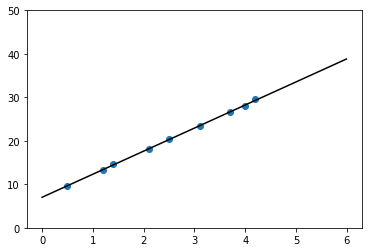

In [15]:
plt.ylim(0,50)
dr = lambda x:a*x+b
X2 = np.arange(0,6,0.01)
plt.plot(X,Y,'o',X2,dr(X2),'k') ; plt.show()

### Autre exemple avec génération aléatoire de bruit
On génère des points au hasard d'abscisse dans $[0;2]$ situés sur la droite d'équation $y = 5x+7$ plus un "bruit" suivant la loi normale centrée réduite.

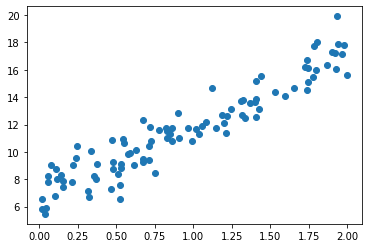

In [118]:
Xr = 2 * np.random.rand(100, 1)
Yr = 5 * Xr + 7 + np.random.randn(100, 1)
plt.plot(Xr,Yr,'o')
plt.show()

In [119]:
# calcul des coefficients de régression
a = ((Xr-Xr.mean())*(Yr-Yr.mean())).mean() / ((Xr-Xr.mean())**2).mean() 
b = Yr.mean() - a*Xr.mean()
a,b

(5.216449394341778, 6.720322872297952)

On n'obtient pas exactement 5 et 7 à cause du bruit aléatoire

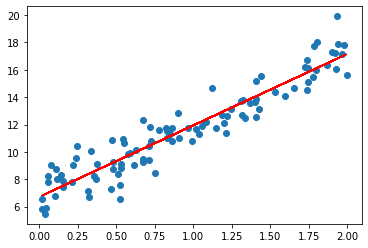

In [120]:
plt.plot(Xr,Yr,'o')
plt.plot(Xr,a*Xr+b,'r-')
#plt.plot(X,5*X+7)
plt.show()

## Regression linéaire en dimension $d$

On passe au cas général. $$\def \bx{{\bf x}}$$
Les données sont de la forme $(\bx^i,y^i)$ mais les $\bx^i$ sont des vecteurs de dimension $d$
$$\bx^i = (x^i_1,x^i_2,\cdots,x^i_d) \in \mathbb{R}^d$$

On cherche à approximer une fonction inconnue $f$ telle que
$$y_i = f(x^i_1,x^i_2,\cdots,x^i_d)$$
par une fonction multilinéaire (affine) de la forme
$$g(\bx) = a_0 + a_1 x_1 + a_2 x_2 + \dots a_d x_d$$

### exemple : jeu de données *Advertising*
Données commerciales sur les ventes d'un produit dans différents points de vente en fonction du budget dépensé en publicité dans trois medias différents.

In [2]:
import sklearn as sk
import pandas as pd
data_adv = pd.read_csv("datasets/advertising.csv")
data_adv

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [323]:
data_adv.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


Peut-on prédire les ventes en fonction de la publicité dépensée ? Quel est l'investissement le plus rentable ?
On va chercher à écrire une relation
$$ S \approx a_0 + a_1 TV + a_2 Rad + a_3 News $$

### Résolution
Pour l'analyse il est plus facile d'ajouter une $(d+1)$-ième coordonnée à l'indice 0 aux vecteurs $x^i$, qui vaut toujours $1$, de sorte qu'on puisse écrire $g(x)$ sous la forme
$$g(\bx) = \sum_{j=0}^d a_j x_j$$ 
et se ramener à la recherche d'une fonction sans terme constant.

L'erreur quadratique moyenne est donnée par
$$
\begin{align}
EQM &= \frac1{m} \sum_{i=1}^m (\sum_{j=0}^d a_j x^i_j - y^i)^2 \\
    &= \frac1{m} \sum_{i=1}^m (g(\x^i) - y^i)^2
\end{align}$$

La fonction EQM admet un minimum par convexité, une condition nécessaire est que le gradient soit nul
$$\forall 0 \leq k \leq d, \frac{\partial}{\partial a_k} \left( \sum_{i=1}^m (\sum_{j=0}^d a_j x^i_j - y^i)^2 \right) = 0$$

soit
$$\forall 0 \leq k \leq d, \sum_{i=1}^m x_k^i \left(\sum_{j=0}^d a_j x^i_j - y^i \right) = 0$$

$$\forall 0 \leq k \leq m, \sum_{i=1}^m \sum_{j=0}^d x_k^i  x^i_j a_j = \sum_{i=1}^m x_k^i y^i $$

On introduit les notations : $$\def\ba{{\bf a}} \def\by{{\bf y}}$$
- matrice $X$ avec $X_{i,j}=x^i_j$ pour $1 \leq i \leq m$ et $0 \leq j \leq d$. La matrice $X$ contient donc chacun des vecteurs de données sur ses lignes et les colonnes correspondent aux caractéristiques des données. 
- vecteur $\ba$ avec $\ba_j = a_j$ pour $0 \leq j \leq d$
- vecteur $\by$ avec $\by_i = y^i$ pour $1 \leq i \leq m$


à $k$ fixé 
$$\sum_{i=1}^m \sum_{j=0}^d x_k^i  x^i_j a_j = \sum_{i=1}^m x_k^i y^i $$
s'écrit
$$(X^T X \cdot \a)_k = (X^T \cdot \y)_k$$  
et l'ensemble de ces relations est donc
$$\boxed{X^T X \cdot \a = X^T \cdot \y}$$
dimension 
$$(d+1,m)(m,d+1)(d+1,1) = (d+1,m)(m,1) = (d+1,1)$$
(vecteur colonne)  
Cette équation connue sous le nom d'**equation normale**.

La matrice $X^T X$ est une matrice carrée $(d+1) \times (d+1)$. En pratique elle est souvent inversible et on trouve une solution unique à cette équation qui est
$$ \boxed{\a = (X^T X \cdot )^{-1} X^T \cdot \y}$$

Si $X^T X$ n'est pas inversible on peut montrer qu'il existe toujours une solution à cette équation, mais elle n'est pas forcément unique (dans ce cas il existe plusieurs vecteurs $\ba$ donnant le minimum de l'EQM -- c'est un signe que les caractéristiques des données sont redondantes).

### Retour sur l'exemple *Advertising*

In [3]:
Xadv = data_adv.to_numpy()[:,0:3] ; Yadv = data_adv.to_numpy()[:,3]
print(Xadv[:5], Yadv[:5])
print(Xadv.shape,Yadv.shape)

[[230.1  37.8  69.2]
 [ 44.5  39.3  45.1]
 [ 17.2  45.9  69.3]
 [151.5  41.3  58.5]
 [180.8  10.8  58.4]] [22.1 10.4 12.  16.5 17.9]
(200, 3) (200,)


On ajoute une colonne de 1

In [5]:
import numpy as np
Xadva = np.concatenate( (np.ones((200,1)), Xadv), axis=1) #Xadv augmenté
print(Xadva[:5])
print(Xadva.shape)

[[  1.  230.1  37.8  69.2]
 [  1.   44.5  39.3  45.1]
 [  1.   17.2  45.9  69.3]
 [  1.  151.5  41.3  58.5]
 [  1.  180.8  10.8  58.4]]
(200, 4)


$$ \boxed{\a = (X^T X \cdot )^{-1} X^T \cdot \y}$$

In [6]:
a = np.linalg.inv(Xadva.T.dot(Xadva)).dot(Xadva.T).dot(Yadv)
print(a)

[4.62512408e+00 5.44457803e-02 1.07001228e-01 3.35657922e-04]


In [12]:
erreur = Xadva.dot(a) - Yadv
#erreur moyenne quadratique
eqm_adv = (erreur**2).mean()
print( (Xadva.dot(a) - Yadv)[:10]   )
print(eqm_adv, np.sqrt(eqm_adv))

[-0.87902791  0.86824775 -1.50379103  0.81244651 -2.25586315  3.15633677
 -0.5267153   0.07062458  0.51839603  0.18871013]
2.706006147627315 1.6449942697855562


In [322]:
predictions_eq_normale = Xadva.dot(a)[:10]
print(predictions_eq_normale)

[21.22097209 11.26824775 10.49620897 17.31244651 15.64413685 10.35633677
 11.2732847  13.27062458  5.31839603 15.78871013]


### Même exemple en utilisant la bibliothèque sklearn

In [13]:
import sklearn as sk
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

In [14]:
X = data_adv.to_numpy()[:,0:3] #on elimine la colonne de 1
lin_reg.fit(X,Yadv)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [313]:
lin_reg.coef_

array([0.05444578, 0.10700123, 0.00033566])

In [15]:
print(lin_reg.intercept_, a[0])

4.625124078808653 4.625124078808693


Comparaison de valeurs prédites aux cibles/étiquettes données

In [324]:
predictions_sk = lin_reg.predict(Xadv)[:10]
print(predictions_sk)
print(Yadv[:10])

[21.22097209 11.26824775 10.49620897 17.31244651 15.64413685 10.35633677
 11.2732847  13.27062458  5.31839603 15.78871013]
[22.1 10.4 12.  16.5 17.9  7.2 11.8 13.2  4.8 15.6]


In [136]:
from sklearn.metrics import mean_squared_error
mean_squared_error(lin_reg.predict(X),Yadv)

2.706006147627315

## Descente de gradient
### Analyse de complexité de l'équation normale

Rappel : $m$ données avec $d$ caractéristiques chacunes et on résout
$$X^T X \cdot \a = X^T \cdot \y$$
X est une matrice de dimension $(m,d)$, calculer $X^T X$ demande donc un temps $O(md^2)$.  
Le système à résoudre est dimension $(d,d)$ ce qui prend (pour une résolution exacte) un temps O(d^3)
Donc la résolution directe via equation normale convient si $d$ n'est pas trop grand.  
Exemple où $d$ est grand ?

### Minimisation de l'EMQ via descente de gradient
Si $d$ est grand, on peut chercher à minimiser directement
\begin{align}
EQM(a) &= \frac{1}{m} \sum_{i=1}^m (\sum_{j=0}^d a_j x^i_j - y^i)^2 \\
       &= \frac{1}{m} (Xa-y)^T (Xa-y)
\end{align}
via une descente de gradient

Le gradient de l'EQM s'écrit (cf exercice 1)
$$\nabla_{EQM}(a) = \frac{2}{m} X^T (Xa-y)$$
La $k$-ième coordonnée de ce gradient est
$$ \frac{2}{m} \x_k^T (Xa-y) = \frac{2}{m} \sum_{i=1}^m x^i_k (g_a(x_i)-y^i)$$ 

On obtient donc l'algorithme de descente de gradient à pas $\alpha$ en appliquant à chaque étape
$$ a_k \longleftarrow  a_k - \frac{2\alpha}{m} \sum_{i=1}^m x^i_k (g_a(x_i)-y) $$
pour chaque coordonnée $ 0 \leq k \leq d$.

### Exemple sur droite bruitée

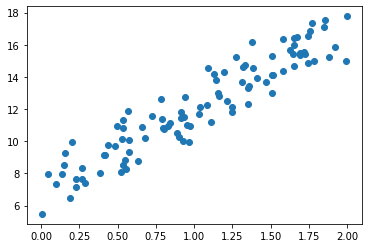

In [19]:
import matplotlib.pyplot as plt
Xr_plot = 2 * np.random.rand(100, 1)
Yr = 5 * Xr_plot + 7 + np.random.randn(100, 1)
plt.plot(Xr_plot,Yr,'o')
plt.show()

In [16]:
#on reprend le code du cours 3
def descente_gradient(f, grad, epsilon, alpha, p0, max_iter=10000):
    """f fonction a minimiser, grad son gradient (prennent un np.array en argument)
    alpha pas d'apprentissage
    epsilon tolérance
    p0 point initial"""
    p = p0
    k = 0
    points = [p0]
    print( "f(" +str(p)+ ")=" + str(f(p)))
    while (grad(p)**2).sum() >= epsilon**2 and k<max_iter:
        p = p - alpha*grad(p)
        k +=1
        points.append(p)
    print( "f(" +str(p)+ ")=" + str(f(p)))
    return k, points

In [21]:
Xr = Xr_plot.reshape(-1,1)  #-1 veut dire que numpy met la bonne valeur (len(Xr) en fait)
#preparation des données avec une colonne de 1 au départ
Xra = np.concatenate( (np.ones((len(Xr),1)), Xr), axis=1)  #Xr augmenté
#definition de l'erreur quadratique et de son gradient
f_eqm = lambda A : ((Xra.dot(A)-Yr)**2).sum() / len(Xra)
grad_eqm = lambda A : 2/len(Xra)*Xra.T.dot(Xra.dot(A)-Yr)

In [397]:
A0 = np.array([0,0]).reshape(-1,1)
k, points = descente_gradient(f_eqm, grad_eqm, alpha=0.1, epsilon=0.001, p0=A0)
print(k)

f([[0]
 [0]])=145.16673667822866
f([[6.9407314]
 [5.1125561]])=1.0572840219320718
179


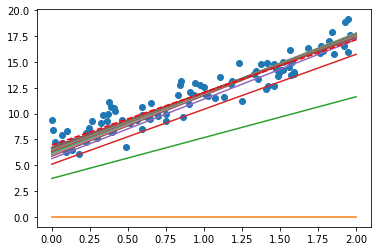

In [398]:
plt.plot(Xr_plot,Yr,'o')
X = np.linspace(0,2,200)
Xa = np.concatenate( (np.ones((len(X),1)), X.reshape(200,1)), axis=1)
for p in points[:50:2]:
    plt.plot(X, Xa.dot(p).flatten() )
plt.plot(X, Xa.dot(points[-1]).flatten(), "r--" )
plt.show()

Comparaison des résultats obtenus avec ceux de sklearn

In [399]:
points[-1] #le dernier

array([[6.9407314],
       [5.1125561]])

In [400]:
lin_reg.fit(Xr,Yr)
print(lin_reg.coef_, lin_reg.intercept_, mean_squared_error(lin_reg.predict(Xr),Yr))

[[5.11071762]] [6.94277151] 1.0572826874481314


### descente de gradient sur *advertising*

In [401]:
f_eqm = lambda A : ((Xadva.dot(A)-Yadv)**2).sum() / len(Xadva)
grad_eqm = lambda A : 2/len(Xadva)*Xadva.T.dot(Xadva.dot(A)-Yadv)

In [402]:
A0 = np.array([0,0,0,0])

In [404]:
k, points = descente_gradient(f_eqm, grad_eqm, epsilon=0.1, alpha=0.00003, p0=A0, max_iter=500000)
coeffs_adv = points[-1]
print(k)

f([0 0 0 0])=256.71195
f([4.28264971e+00 5.53810381e-02 1.10929957e-01 2.41585379e-03])=2.7231313354737363
297132


Comparaison avec les résultats de l'équation normale et les étiquettes véritables (target)

In [406]:
prediction_gd = Xadva[:10,:].dot(coeffs_adv)
print(prediction_gd)
print(predictions_eq_normale)
print(Yadv[:10])

[21.38615601 11.2156082  10.49430724 17.39561163 15.63467078 10.37012865
 11.16233454 13.14170154  4.9942954  15.6874151 ]
[21.22097209 11.26824775 10.49620897 17.31244651 15.64413685 10.35633677
 11.2732847  13.27062458  5.31839603 15.78871013]
[22.1 10.4 12.  16.5 17.9  7.2 11.8 13.2  4.8 15.6]


## La mise à l'échelle des données (*feature scaling*)

Si les caractéristiques (colonnes de la matrice $X$) dont de nature diverses elles peuvent s'exprimer dans des échelles très différentes (des valeurs très grandes, d'autres petites, d'autres négatives, etc.)  
Dans ce cas la forme de "bol" autour du minimum a une forme d'ellipse très aplatie.
<img src="images/scaling.png" width=500 alt="ellipse avec ou sans scaling">

Il convient alors de mettre les données à la même échelle (*scaling*) sous peine d'avoir une convergence plus lente.
Voici deux façons courantes pour mettre à l'échelle, que l'on applique caractéristique par caractéristique (colonne par colonne)

1. **MinMax Scaling**
Soient $x_\min$ et $x_\max$ le minimum et maximum des valeurs de chaque colonne.  
On remplace chaque donnée $x$ par
$$x' = \frac{x - x_\min}{x_\max - x_\min }$$
Cela ramène toutes les colonnes dans l'intervalle $[0,1]$


2. **Standard Scaling** Soit $\bar{x}$ la moyenne des données de la colonne et $\sigma$ son écart type  
On remplace chaque valeur $x$ par
$$x' = \frac{x - \bar{x}}{\sigma}$$
Cela rend chaque colonne de moyenne 0 et écart type $1$.

In [408]:
from sklearn.preprocessing import StandardScaler
scaler_X = StandardScaler()
scaler_X.fit(Xadv)
Xadv_sc = scaler_X.transform(Xadv)
Xadv_sc = np.concatenate( (np.ones((len(Xadv_sc),1)), Xadv_sc), axis=1) 
print(Xadv_sc[:5],"\n", Xadva[:5])

[[ 1.          0.96985227  0.98152247  1.77894547]
 [ 1.         -1.19737623  1.08280781  0.66957876]
 [ 1.         -1.51615499  1.52846331  1.78354865]
 [ 1.          0.05204968  1.21785493  1.28640506]
 [ 1.          0.3941822  -0.84161366  1.28180188]] 
 [[  1.  230.1  37.8  69.2]
 [  1.   44.5  39.3  45.1]
 [  1.   17.2  45.9  69.3]
 [  1.  151.5  41.3  58.5]
 [  1.  180.8  10.8  58.4]]


In [409]:
#definition de l'erreur quadratique et son gradient sur les données normalisées
f_eqm = lambda A : ((Xadv_sc.dot(A)-Yadv)**2).sum() / len(Xadv_sc)
grad_eqm = lambda A : 2/len(Xadv_sc)*Xadv_sc.T.dot(Xadv_sc.dot(A)-Yadv)

In [412]:
k, points = descente_gradient(f_eqm, grad_eqm, epsilon=0.01, alpha=0.1, p0=A0, max_iter=5000000)
coeffs_adv_sc = points[-1]
print(k)

f([0 0 0 0])=256.71195
f([1.51279860e+01 4.66185245e+00 1.58113599e+00 1.10469926e-02])=2.7060302576400166
39


In [414]:
#comparaison des predictions obtenues
prediction_gd_sc = Xadv_sc[:10].dot(coeffs_adv_sc)
print(prediction_gd_sc)
print(Yadv[:10])
print(coeffs_adv_sc)

[21.22086668 11.26545796 10.49630638 17.31043913 15.64905967 10.35679171
 11.26817497 13.26596948  5.31716616 15.78896048]
[22.1 10.4 12.  16.5 17.9  7.2 11.8 13.2  4.8 15.6]
[1.51279860e+01 4.66185245e+00 1.58113599e+00 1.10469926e-02]


## Exercices
### (maths)
Obtenir la formule du gradient de l'erreur quadratique moyenne, sous forme matricielle, et directement sous forme de somme.

### (maths)
On considère des données en dimension 1,   $Y=[y^1, y^2, \dots, y^m]$.
Déterminez quelles sont la ou les valeurs de $y$ qui minimisent l'erreur en norme 1 ou **erreur absolue**
$$E_1 = \frac{1}{m} \sum_{i=1}^m | y - y^i | $$
indication : considérer les $y^i$ en ordre croissant et regarder comment l'erreur varie quand $y$ grandit suivant le nombre de $y^i$ plus petits ou plus grands que $y$.
Vous pouvez vous aider d'un exemple numérique où vous tracez E_1 en fonction de y pour des données fixées (traçage fait à la main ou avec pyplot).


### (programmation)
Générez un jeu de 100 données mais ayant un grand nombre de caractéristiques ($m=100$, $d$ grand). Tentez de faire une regression linéaire avec l'équation normale. A partir de quelles valeurs de $d$ cela commence-t'il à "ramer" ?
Résolvez ensuite avec la descente de gradient de sklearn.

### (programmation)
(programmation) En dimension 2, générez comme dans le cours des points sur une droite  (par exemple $y=5x+3$ sur $[0,1]$), bruitée  par une loi normale $N(0,\sigma)$. Faites une regression linéaire pour obtenir une droite et calculez l'erreur moyenne quadratique minimale $EQM(\sigma)$. Faites une représentation graphique de $EQM(\sigma)$ en fonction de $\sigma$ pour $\sigma$ de 0 à 10.


### (programmation)
En dimension 2, générez une matrice de points dont les coordonnées ne sont pas à la même échelle (par exemple, prendre une version bruitée de $y= ax + b$ pour $a$ grand par rapport à $b$ sur $[0,1]$. Faites une représentation graphique en courbes de niveau de l'EQM et observez son caractère plus ou moins elliptique pour différentes valeurs de $a$ et $b$.

### (programmation)
Suite de l'exercice précédent. Avec des paramètres de descente de gradient fixés, calculez le nombre d'étapes $k(a,b)$ de l'algorithme pour $a$ et $b$ donnés. Obtenez une représentation graphique de $k$ en fonction de $a$ et $b$.